In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load data
df2 = pd.read_excel('Datasets/Nepal Master Sheet.xlsx', sheet_name='Final_compiled')
df = df2.copy()



# Define Traverse assignment function (same as before)
def assign_traverse(gns):
    if not isinstance(gns, str):  # Handle non-string values
        return None
    gns = gns.split('22')[0].split('23')[0].strip("'").strip('"')
    if gns.startswith("S1"):
        return "Traverse 1*" if gns in ["S1m", "S1i"] else "Traverse 1"
    elif gns.startswith("S2"):
        return "Traverse 2"
    elif gns.startswith("S3"):
        if gns in ["S3k", "S3m", "S3u", "S3s", "S3ag", "S3ad"]:
            return "Traverse 4"
        elif gns in ["S3y", "S3ae"]:
            return "Traverse 3*"
        return "Traverse 3"
    elif gns.startswith("S4"):
        return "Traverse 5*" if gns in ["S4m", "S4l"] else "Traverse 5"
    return None



df["Traverse"] = df["GNS"].apply(assign_traverse)
df = df[df["Traverse"] == "Traverse 3"]



# Convert Si concentrations to millimolar
df['Si_mM'] = df['Si_ppm'] / 28.085

# Convert Si concentrations to nanomolar
df['Si_nM'] = df['Si_ppm'] * 1000000 / 28.085

# Convert Si concentrations to mol/m^3 (from nM)
df['Si_mol_m3'] = df['Si_nM'] * 1e-6  # Convert nM to mol/m^3


variable = "Si_mol_m3"



In [ ]:
# Reaction rate constant k (log10 form) and unit conversion
log_k = -11.2  # Example log10 k value
k = np.exp(log_k)  # Convert to mol/m^2/s
phi = 0.07
A_s = 1  # Assume unit specific surface area for simplicity


# purge df[] of NaN values
df = df.dropna(subset=[variable])

# Initial concentration values
C_zero = df[variable].min()  # Initial concentration (mol/m^3)
C_max = df[variable].max()  # Maximum concentration (mol/m^3)

# Parametrized concentrations (C')
C_Meas = df[variable].values / C_zero  # Normalize C by C_zero



# Timescale and bounds for T_res
time_guess = 60 * 60  # Example timescale (25 years in seconds)
T_res_min, T_res_max = 1 * 24 * 60 * 60, 100 * 365 * 24 * 60 * 60  # 1 day to 100 years



T_res_guess = time_guess
phi_guess = phi
f_guess = 0.5



Nd_guess = time_guess * k / (phi * C_zero)



In [71]:
# Cz' = Nd(1-f)z' + Co'

#Co' = Co = C_zero

# Simulate between z' = 0 and z' = 1 in timestep of 0.01
z_prime = np.arange(0, 1.0, 0.01)
Cz_prime = Nd * (1 - f) * z_prime + C_zero




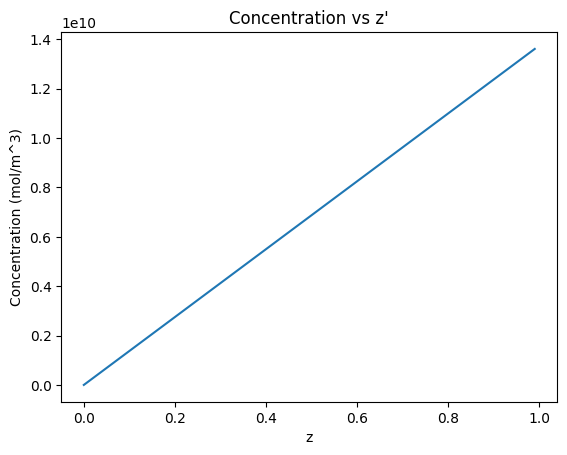

In [72]:
# plot Conc vs z'
plt.plot(z_prime, Cz_prime)
plt.xlabel("z")
plt.ylabel("Concentration (mol/m^3)")
plt.title("Concentration vs z'")
plt.show()

In [73]:

import pylab as P
import numpy as N
from scipy import optimize

What we do next depends on what level we think our hypothetical experiments might differ from each other. I'll make the assumption here that the times of measurement between x=0.5 and x=3.0 were random. In that case, we would need to include this variation of measurement-time in our simulations in order to report the range of values another experimenter might find if they used a similar setu

In [271]:




# C = Co + Z * Nd*(1-f)
# C is measured
# Z is calculated
# 
# (C - Co) / ( Nd*(1-f) ) = Z

# Z = C / ( Nd*(1-f) ) - Co / ( Nd*(1-f) )
# In form y = mx + c
# y = Z
# m = 1 / ( Nd*(1-f) )
# x = C

# We have measured values of C



# Need to use C prime and not just C
# C prime = C/Co


# Reaction rate constant k (log10 form) and unit conversion
log_k = -11.2  # Example log10 k value
k = np.exp(log_k)  # Convert to mol/m^2/s
phi = 0.07
A_s = 1  # Assume unit specific surface area for simplicity


# purge df[] of NaN values
df = df.dropna(subset=[variable])

# Initial concentration values
C_zero = df[variable].min()  # Initial concentration (mol/m^3)
C_max = df[variable].max()  # Maximum concentration (mol/m^3)

# Parametrized concentrations (C')
C_Meas = df[variable].values / C_zero  # Normalize C by C_zero



# Timescale and bounds for T_res
time_guess = 1.3 * 60 * 60  # Example timescale (one day in seconds)


T_res_guess = time_guess
phi_guess = phi
f_guess = 0.5



Nd_guess = time_guess * k / (phi * C_zero)



# Define the model

def calc_Z_prime_Meas(CTrial, T_res, phi, f, k, C_zero):
    Nd = (T_res * k) / (phi * C_zero)  # Calculate Nd dynamically
    Z_prime = (CTrial - C_zero) / (Nd * (1 - f))  # Z' is based directly on the model
    return Z_prime  # No clipping or normalization

# vPars, aCova = optimize.curve_fit(calc_Z_Meas, C_Meas, Z_Meas, vGuess)


# Parameter ranges
#T_res_min, T_res_max = one day, 100 years
T_res_min, T_res_max = 0.1 * 60 * 60, 100 * 365 * 24 * 60 * 60  # Bounds for T_res
phi_min, phi_max = 0.01, 0.3    # Bounds for phi
f_min, f_max = 0, 1             # Bounds for f


param_bounds = (
    [T_res_min, phi_min, f_min],  # Lower bounds for T_res, phi, f
    [T_res_max, phi_max, f_max],  # Upper bounds for T_res, phi, f
)


In [286]:
nTrials = 100000
aFitPars = None

fit_metrics = []  # To store mean residuals for each trial
trial_data = []  # To store synthetic datasets for each trial (CTrial_array)
run_results = [] 


for iTrial in range(nTrials):
    
    # Initialize arrays for synthetic data generation
    CTrial_list = []
    ZGen_prime_list = []
    
    # for one point
    # CTrial = N.random.uniform(C_zero,C_max,size=N.size(C_Meas))
    # ZGen = calc_Z_Meas(CTrial, Nd_guess, f_guess)
    
    # sError = N.std(ZGen) * 0.1  # Adjust this based on your error model
    
    # zTrial = ZGen + N.random.normal(scale=sError,size=N.size(ZGen))
    
    
    # for multiple points
    
    while len(CTrial_list) < len(C_Meas):  # Ensure enough points are generated
        # Generate normalized concentrations (C')
        CTrial_prime = np.random.uniform(C_zero, C_max, size=len(C_Meas))  # Generate C within bounds

        Z_prime_Gen = calc_Z_prime_Meas(
            CTrial_prime, time_guess, phi, f=0.5, k=k, C_zero=C_zero
        )
        CTrial_list.extend(CTrial_prime.tolist())
        ZGen_prime_list.extend(Z_prime_Gen.tolist())
        
        
        
    # Truncate to match the exact size of C_Meas
    CTrial_array = np.array(CTrial_list[:len(C_Meas)])
    Z_prime_Gen_array = np.array(ZGen_prime_list[:len(C_Meas)])


    # Add noise to generate zTrial
    sError = np.std(Z_prime_Gen_array) * 0.1
    zTrial = Z_prime_Gen_array + np.random.normal(scale=sError, size=len(Z_prime_Gen_array))
    
    
    # Store synthetic dataset for later analysis
    trial_data.append(CTrial_array)
    
    
    
    # Generate guesses within ±100% for T_res, phi, f
    # Generate guesses for T_res, phi, f within ±100% of initial guesses
    T_res_guess_too = np.random.uniform(time_guess * 0.5, time_guess * 1.5)
    
    phi_guess_too = np.random.uniform(phi * 0.5, phi * 1.5)
    
    f_guess_too = np.random.uniform(0.25, 0.75)  # Narrower range for better guesses
    
    vGuess = [T_res_guess_too, phi_guess_too, f_guess_too]
    
    # Fit the model
    try:
        vTrial, aCova = optimize.curve_fit(
            lambda CTrial, T_res, phi, f: calc_Z_prime_Meas(CTrial, T_res, phi, f, k, C_zero),
            CTrial_array,
            zTrial,
            p0=vGuess,
            bounds=param_bounds,
        )
    except Exception as e:
        print(f"Trial {iTrial + 1} failed: {e}")
        continue
    
    
    
   # Generate fitted C' using vTrial
    T_res_fit, phi_fit, f_fit = vTrial
    
    Nd_fit = (T_res_fit * k) / (phi_fit * C_zero)
    
    Z_prime_fitted = calc_Z_prime_Meas(C_Meas, T_res_fit, phi_fit, f_fit, k, C_zero)
    
    C_fitted = Nd_fit * (1 - f_fit) * Z_prime_fitted + C_zero
    
    
    
    # Compute Z' for original C_Meas using initial guesses
    Z_prime_meas = calc_Z_prime_Meas(C_Meas, T_res_guess, phi_guess, f_guess, k, C_zero)

    # Compute Z' for fitted C_fitted
    Z_prime_fitted = calc_Z_prime_Meas(C_fitted, T_res_fit, phi_fit, f_fit, k, C_zero)

    # Sort by C_Meas for consistent comparison
    sorted_indices_meas = np.argsort(C_Meas)
    sorted_indices_fitted = np.argsort(C_fitted)

    C_Meas_sorted = C_Meas[sorted_indices_meas]
    C_fitted_sorted = C_fitted[sorted_indices_fitted]
    Z_prime_meas_sorted = Z_prime_meas[sorted_indices_meas]
    Z_prime_fitted_sorted = Z_prime_fitted[sorted_indices_fitted]

    # Compute gradients (slopes) for both lines
    gradient_meas = np.gradient(Z_prime_meas_sorted, C_Meas_sorted)
    gradient_fitted = np.gradient(Z_prime_fitted_sorted, C_fitted_sorted)

    # Compute residuals as the difference in gradients
    gradient_residuals = np.abs(gradient_meas - gradient_fitted)

    # Calculate RSS based on gradient differences
    rss = np.sum(gradient_residuals**2)
        
    # Store RSS in fit_metrics
    fit_metrics.append(rss)
    
    run_results.append({
        "run": iTrial + 1,
        "T_res": T_res_fit,
        "phi": phi_fit,
        "f": f_fit,
        "rss": rss,
    })
    
    
    
    
    #here follows the syntax for stacking the trial onto the running sample:
    if aFitPars is None:
        aFitPars = N.array([vTrial])  # Wrap in a list to ensure 2D
    else:
        aFitPars = N.vstack((aFitPars, vTrial))
        

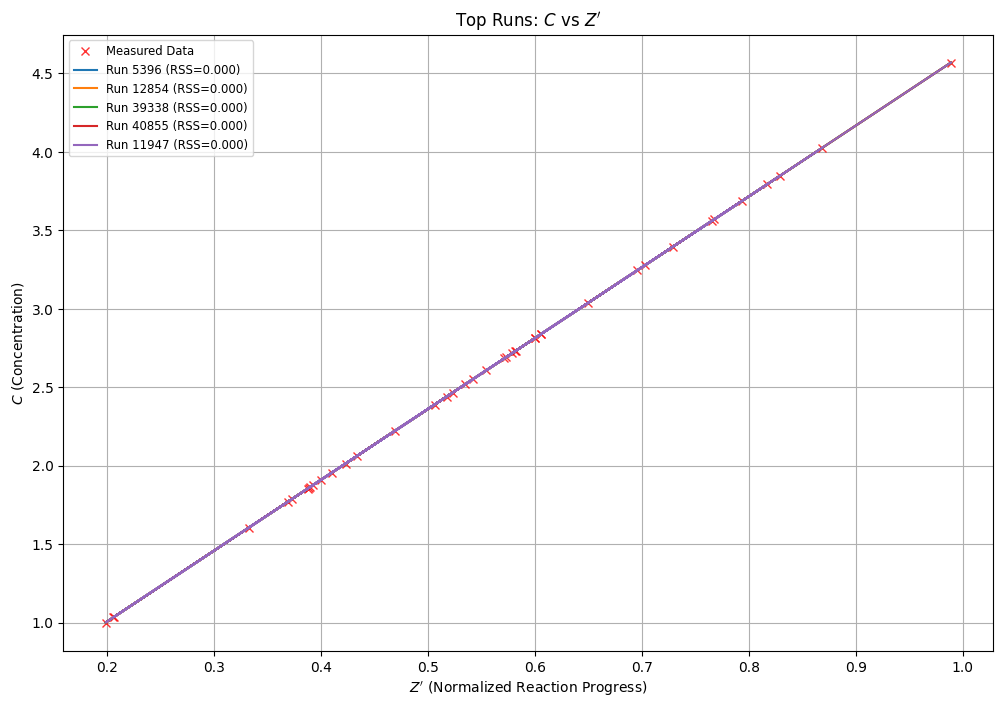

In [274]:
# Find indices of the best runs based on RSS (e.g., top 5 runs)
sorted_indices = np.argsort(fit_metrics)
top_indices = sorted_indices[:5]  # Adjust the number of top runs to display


# Plot measured data
Nd_measured = (T_res_guess * k) / (phi_guess * C_zero)
Z_prime_measured = calc_Z_prime_Meas(C_Meas, T_res_guess, phi_guess, f_guess, k, C_zero)


plt.figure(figsize=(12, 8))
plt.plot(Z_prime_measured, C_Meas, 'x', label="Measured Data", color="red", alpha=0.8)


# Plot the best runs
for idx in top_indices:
    # Retrieve parameters for the best run
    T_res_best = run_results[idx]["T_res"]
    phi_best = run_results[idx]["phi"]
    f_best = run_results[idx]["f"]
    Nd_best = (T_res_best * k) / (phi_best * C_zero)

    # Recompute Z' and C for the best run
    Z_prime_best = calc_Z_prime_Meas(C_Meas, T_res_best, phi_best, f_best, k, C_zero)
    C_best = Nd_best * (1 - f_best) * Z_prime_best + C_zero

    # Plot C vs Z' for the best run
    plt.plot(Z_prime_best, C_best, '-', label=f"Run {idx + 1} (RSS={fit_metrics[idx]:.3f})")


# Add labels, legend, and title
plt.xlabel("$Z'$ (Normalized Reaction Progress)")
plt.ylabel("$C$ (Concentration)")
plt.title("Top Runs: $C$ vs $Z'$")
plt.legend(loc="upper left", fontsize="small")
plt.grid()
plt.show()

In [275]:
# Print the top 5 parameter sets based on RSS
print("Top 5 Results (Based on RSS):")
print("-" * 50)
for rank, idx in enumerate(top_indices, start=1):
    T_res_best = run_results[idx]["T_res"]
    T_res_best_hours = T_res_best / (60 * 60)
    
    phi_best = run_results[idx]["phi"]
    f_best = run_results[idx]["f"]
    rss_best = run_results[idx]["rss"]
    print(f"Rank {rank}:")
    print(f"  T_res_best_hours: {T_res_best_hours:.2e} hours")
    print(f"  phi: {phi_best:.3f}")
    print(f"  f: {f_best:.3f}")
    print(f"  RSS: {rss_best:.6f}")
    print("-" * 50)

Top 5 Results (Based on RSS):
--------------------------------------------------
Rank 1:
  T_res_best_hours: 1.18e+00 hours
  phi: 0.047
  f: 0.629
  RSS: 0.000000
--------------------------------------------------
Rank 2:
  T_res_best_hours: 1.22e+00 hours
  phi: 0.060
  f: 0.541
  RSS: 0.000000
--------------------------------------------------
Rank 3:
  T_res_best_hours: 1.78e+00 hours
  phi: 0.101
  f: 0.472
  RSS: 0.000000
--------------------------------------------------
Rank 4:
  T_res_best_hours: 2.29e+00 hours
  phi: 0.079
  f: 0.678
  RSS: 0.000000
--------------------------------------------------
Rank 5:
  T_res_best_hours: 1.42e+00 hours
  phi: 0.095
  f: 0.381
  RSS: 0.000000
--------------------------------------------------


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44770/3563621009.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


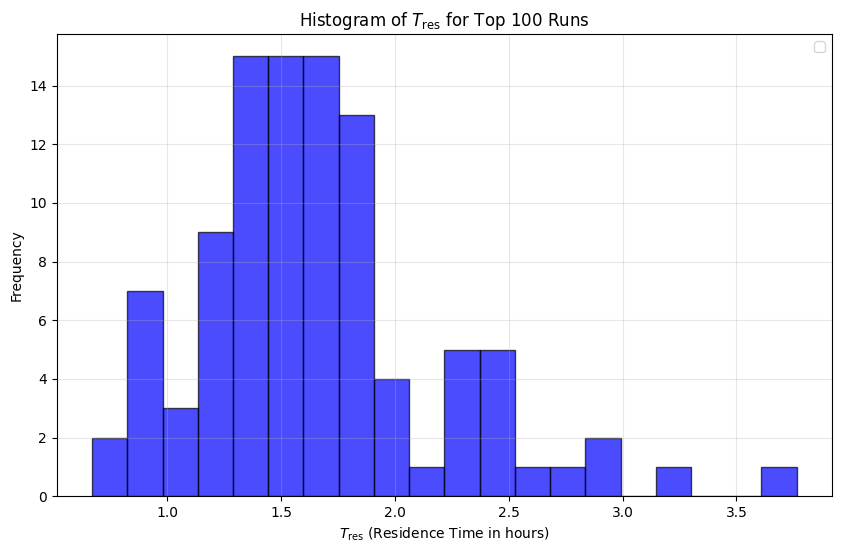

In [281]:
# Extract T_res for the top 100 runs and convert to hours
T_res_top_100_hours = [run_results[idx]["T_res"] / 3600 for idx in top_100_indices]
phi_top_100 = [run_results[idx]["phi"] for idx in top_100_indices]
f_top_100 = [run_results[idx]["f"] for idx in top_100_indices]


# Get the best T_res (for the best run) and convert to hours
T_res_best_hours = run_results[top_100_indices[0]]["T_res"] / 3600  # The first entry in top_100_indices is the best run

# Plot histogram of T_res for the top 100 runs in hours
plt.figure(figsize=(10, 6))
plt.hist(T_res_top_100_hours, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Add a vertical line for T_res_best
#plt.axvline(T_res_best_hours, color='red', linestyle='--', label=f"Best T_res = {T_res_best_hours:.2e} hours")

# Add labels, title, and legend
plt.xlabel("$T_{\\text{res}}$ (Residence Time in hours)")
plt.ylabel("Frequency")
plt.title("Histogram of $T_{\\text{res}}$ for Top 100 Runs")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44770/3292823468.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


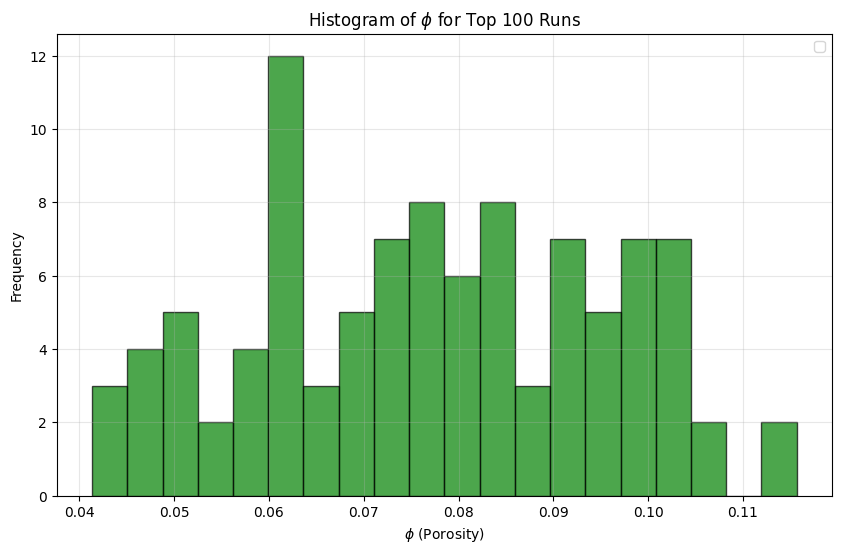

In [283]:
# Plot histogram for phi
plt.figure(figsize=(10, 6))
plt.hist(phi_top_100, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel("$\\phi$ (Porosity)")
plt.ylabel("Frequency")
plt.title("Histogram of $\\phi$ for Top 100 Runs")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44770/207850710.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


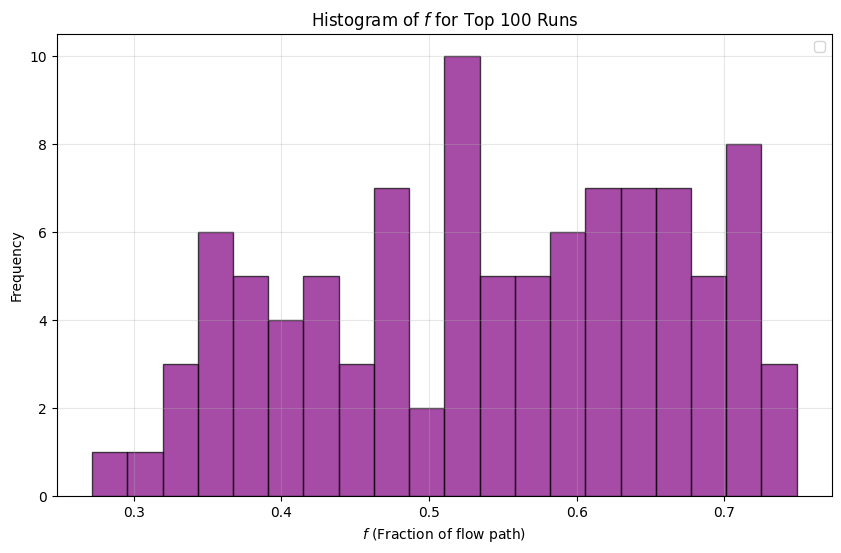

In [285]:
# Plot histogram for f
plt.figure(figsize=(10, 6))
plt.hist(f_top_100, bins=20, alpha=0.7, color='purple', edgecolor='black')
# plt.axvline(np.median(f_top_100), color='red', linestyle='--', label=f"Median $f$ = {np.median(f_top_100):.3f}")
plt.xlabel("$f$ (Fraction of flow path)")
plt.ylabel("Frequency")
plt.title("Histogram of $f$ for Top 100 Runs")
plt.legend()
plt.grid(alpha=0.3)
plt.show()